In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
file_path = "/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/CCK8_Transfection_Plots/20240202_CCK8_DIPLibrary01XPBS.xlsx" 
sheet_name = 'combined'  

# creating a dataframe from our xlsx file
df = pd.read_excel(file_path, sheet_name=sheet_name)
print(df.head())

   Variables   Viability  Standard Deviation  Transfection     StdDev
0  Untreated  100.000000            4.641257      0.016667   0.028868
1       pDNA   94.713656            2.900786      0.023333   0.011547
2    LPF2000   78.689427            8.414306     48.540000  15.276580
3     jetPEI   64.207048            4.219298     64.143333   1.764577
4          S   50.770925            6.208319     20.123333   2.959972


In [45]:
# creating variables in our df to use to plot
variable = df['Variables'][::-1]
viability = df['Viability'][::-1]
std_devs = df['Standard Deviation'][::-1]

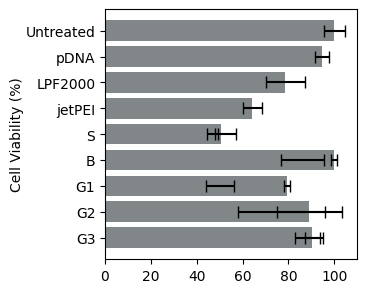

In [46]:
# plotting the CCK8 assay information
color_gray = "#818689"

plt.figure(figsize=(3.25, 3.25))
plt.barh(variable, viability, xerr=std_devs, capsize = 4, color=color_gray)
plt.ylabel('Cell Viability (%)', labelpad=1)

plt.show()

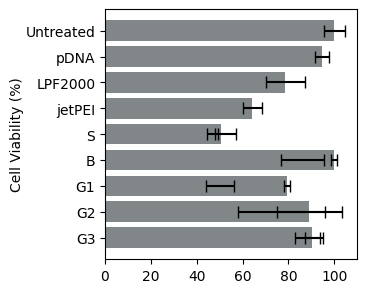

In [47]:
color_gray = "#818689"

plt.figure(figsize=(3.25, 3.25))
plt.barh(variable, viability, xerr=std_devs, capsize=4, color=color_gray)
plt.ylabel('Cell Viability (%)', labelpad=1)

plt.show()

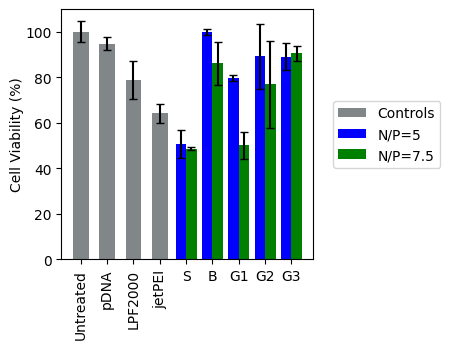

In [48]:
# Find the index where the second set starts
# Assuming that the first occurrence of 'S' is the start of the second set
second_set_start = df[df['Variables'] == 'S'].index[1]

# Split the DataFrame into controls, first set, and second set
df_controls = df.iloc[:4]  # Controls are the first four entries
df_first_set = df.iloc[4:second_set_start]  # First set is from the fifth entry to the second 'S'
df_second_set = df.iloc[second_set_start:]  # Second set starts from the second 'S'

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(3.25, 3.25))
# Define bar width and positions
bar_width = 0.4
# Define control indices (assuming controls are the first four entries)
control_indices = np.arange(len(df_controls))

# Calculate the base x positions for the non-control groups
# This will be the center point between the bars for each group
base_x_positions = np.arange(len(df_controls), len(df_controls) + len(df_first_set))

# Calculate the positions of the first and second set of bars so that they straddle the base position
first_set_indices = base_x_positions - bar_width / 2
second_set_indices = base_x_positions + bar_width / 2

# Plot controls at their base positions
ax.bar(control_indices, df_controls['Viability'], yerr=df_controls['Standard Deviation'], capsize=3, color=color_gray, width=0.6, label='Controls')

# Plot the first set of non-control bars
ax.bar(first_set_indices, df_first_set['Viability'], yerr=df_first_set['Standard Deviation'], capsize=3, color='blue', width=bar_width, label='N/P=5')

# Plot the second set of non-control bars
ax.bar(second_set_indices, df_second_set['Viability'], yerr=df_second_set['Standard Deviation'], capsize=3, color='green', width=bar_width, label='N/P=7.5')

# Now, the x-ticks (labels) are centered between the two sets of bars
# Set the x-ticks and labels
ax.set_xticks(np.arange(len(df_controls) + len(df_first_set)))
ax.set_xticklabels(df_controls['Variables'].tolist() + df_first_set['Variables'].tolist())

# Rotate control labels if needed
for i, label in enumerate(ax.get_xticklabels()):
    if i < len(df_controls):  # Rotate only the control labels
        label.set_rotation(90)
# Set the y-label
ax.set_ylabel('Cell Viability (%)', labelpad=1)

# Add a legend
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=10)

# Display the plot
plt.show()

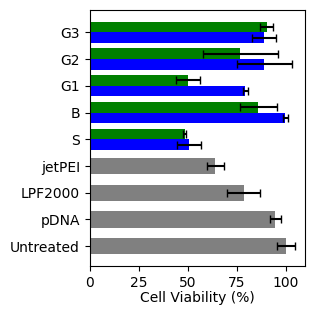

In [51]:
# Find the index where the second set starts
# Assuming that the first occurrence of 'S' is the start of the second set
second_set_start = df[df['Variables'] == 'S'].index[1]

# Split the DataFrame into controls, first set, and second set
df_controls = df.iloc[:4]  # Controls are the first four entries
df_first_set = df.iloc[4:second_set_start]  # First set is from the fifth entry to the second 'S'
df_second_set = df.iloc[second_set_start:]  # Second set starts from the second 'S'

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(3.25, 3.25))  # Adjusted figure size for better visibility
# Define bar width and positions
bar_width = 0.4
# Define control indices (assuming controls are the first four entries)
control_indices = np.arange(len(df_controls))

# Calculate the base y positions for the non-control groups
# This will be the center point between the bars for each group
base_y_positions = np.arange(len(df_controls), len(df_controls) + len(df_first_set))

# Calculate the positions of the first and second set of bars so that they straddle the base position
first_set_indices = base_y_positions - bar_width / 2
second_set_indices = base_y_positions + bar_width / 2

# Plot controls at their base positions
ax.barh(control_indices, df_controls['Viability'], xerr=df_controls['Standard Deviation'], capsize=3, color='gray', height=0.6, label='')

# Plot the first set of non-control bars
ax.barh(first_set_indices, df_first_set['Viability'], xerr=df_first_set['Standard Deviation'], capsize=3, color='blue', height=bar_width, label='N/P=5')

# Plot the second set of non-control bars
ax.barh(second_set_indices, df_second_set['Viability'], xerr=df_second_set['Standard Deviation'], capsize=3, color='green', height=bar_width, label='N/P=7.5')

# Now, the y-ticks (labels) are centered between the two sets of bars
# Set the y-ticks and labels
ax.set_yticks(np.arange(len(df_controls) + len(df_first_set)))
ax.set_yticklabels(df_controls['Variables'].tolist() + df_first_set['Variables'].tolist())

# Set the x-label
ax.set_xlabel('Cell Viability (%)', labelpad=1)

# Add a legend
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Display the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


In [39]:
# creating varibales from our df to plot for our transfection efficiency graph
transfection = df['Transfection']
stddev = df['StdDev']

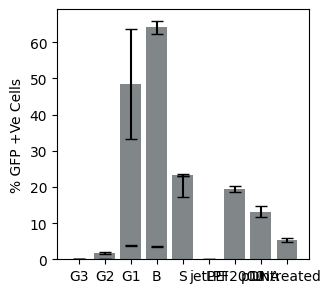

In [40]:
plt.figure(figsize=(3.25, 3.25))
plt.bar(variable, transfection, yerr=stddev, capsize = 4, color=color_gray)
plt.ylim(bottom=0)
plt.ylabel('% GFP +Ve Cells')

plt.show()

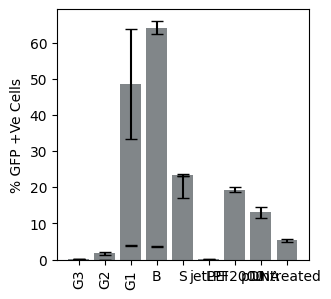

In [41]:
# plotting the CCK8 assay information
color_gray = "#818689"
plt.figure(figsize=(3.25, 3.25))

plt.bar(variable, transfection, yerr=stddev, capsize = 4, color=color_gray)
plt.ylim(bottom=0)
plt.ylabel('% GFP +Ve Cells')

for i, label in enumerate(plt.gca().get_xticklabels()):
    if i < 3: 
        label.set_rotation(90)  

plt.show()

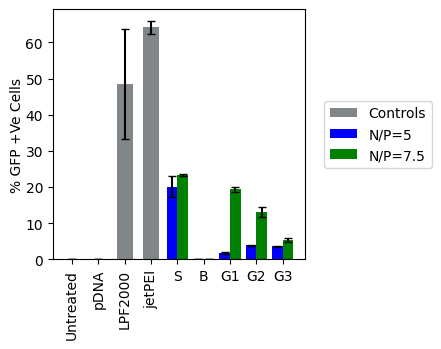

In [42]:
# Find the index where the second set starts
# Assuming that the first occurrence of 'S' is the start of the second set
second_set_start = df[df['Variables'] == 'S'].index[1]

# Split the DataFrame into controls, first set, and second set
df_controls = df.iloc[:4]  # Controls are the first four entries
df_first_set = df.iloc[4:second_set_start]  # First set is from the fifth entry to the second 'S'
df_second_set = df.iloc[second_set_start:]  # Second set starts from the second 'S'

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(3.25, 3.25))
# Define bar width and positions
bar_width = 0.4
# Define control indices (assuming controls are the first four entries)
control_indices = np.arange(len(df_controls))

# Calculate the base x positions for the non-control groups
# This will be the center point between the bars for each group
base_x_positions = np.arange(len(df_controls), len(df_controls) + len(df_first_set))

# Calculate the positions of the first and second set of bars so that they straddle the base position
first_set_indices = base_x_positions - bar_width / 2
second_set_indices = base_x_positions + bar_width / 2

# Plot controls at their base positions
ax.bar(control_indices, df_controls['Transfection'], yerr=df_controls['StdDev'], capsize=3, color=color_gray, width=0.6, label='Controls')

# Plot the first set of non-control bars
ax.bar(first_set_indices, df_first_set['Transfection'], yerr=df_first_set['StdDev'], capsize=3, color='blue', width=bar_width, label='N/P=5')

# Plot the second set of non-control bars
ax.bar(second_set_indices, df_second_set['Transfection'], yerr=df_second_set['StdDev'], capsize=3, color='green', width=bar_width, label='N/P=7.5')

# Now, the x-ticks (labels) are centered between the two sets of bars
# Set the x-ticks and labels
ax.set_xticks(np.arange(len(df_controls) + len(df_first_set)))
ax.set_xticklabels(df_controls['Variables'].tolist() + df_first_set['Variables'].tolist())

# Rotate control labels if needed
for i, label in enumerate(ax.get_xticklabels()):
    if i < len(df_controls):  # Rotate only the control labels
        label.set_rotation(90)
# Set the y-label
ax.set_ylabel('% GFP +Ve Cells', labelpad=1)
ax.set_ylim(bottom=0)

# Add a legend
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=10)

# Display the plot
plt.show()
